In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Chargement du fichier csv dans une dataframe
df = pd.read_csv("/home/mertes/Documents/DU_Data_Analyst/age_gender.csv", sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     23705 non-null  int64
 1   genre   23705 non-null  int64
dtypes: int64(2)
memory usage: 370.5 KB


In [4]:
# Découpage des ages par tranche de 5 ans
age_range = pd.cut(df["age"], bins=range(0,121,5), right=False)

In [5]:
age_range

0           [0, 5)
1           [0, 5)
2           [0, 5)
3           [0, 5)
4           [0, 5)
           ...    
23700    [95, 100)
23701    [95, 100)
23702    [95, 100)
23703    [95, 100)
23704    [95, 100)
Name: age, Length: 23705, dtype: category
Categories (24, interval[int64, left]): [[0, 5) < [5, 10) < [10, 15) < [15, 20) ... [100, 105) < [105, 110) < [110, 115) < [115, 120)]

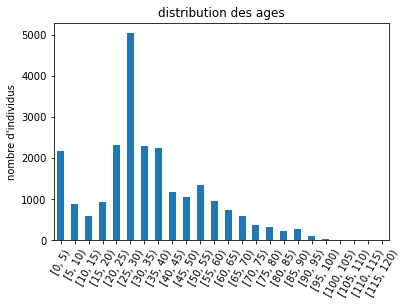

In [6]:
# Distribution des ages par tranches
dist_age = age_range.value_counts().sort_index().plot(kind="bar", rot=60)
plt.title("distribution des ages")
plt.ylabel("nombre d'individus")
plt.show()

In [7]:
# Renomage des genres
df["genre"] = df["genre"].map({0: "homme", 1: "femme"})

# Dataframe avec les tranches d'ages
df["age range"] = age_range

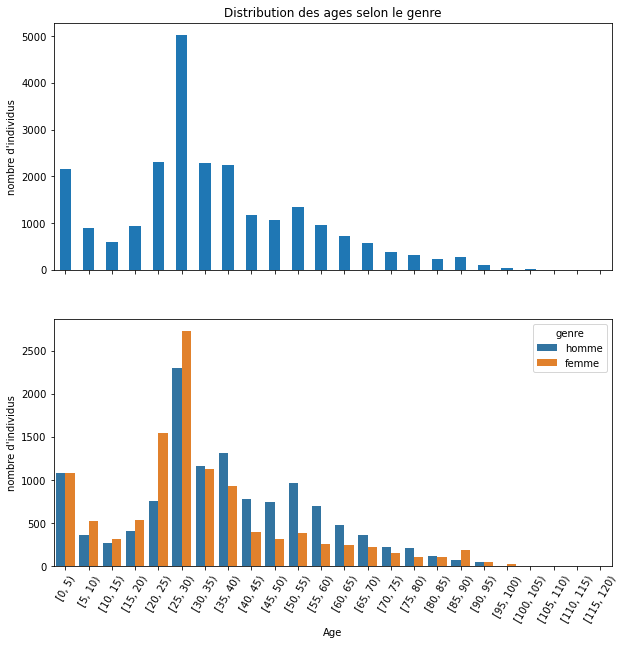

In [8]:
# Définition de 2 subplots horizontaux
fig, (ax1, ax2) = plt.subplots(2,1, sharey=False, sharex=True, figsize=(10,10))

# 1er subplot indiquant la distribution de l'age
age_range.value_counts().sort_index().plot(kind="bar", ax=ax1, rot=60)
ax1.set_title("Distribution des ages selon le genre")
#ax1.set_xlabel("Age")
ax1.set_ylabel("nombre d'individus")

# 2eme subplot indiquant la distribution du genre
sns.countplot(data=df, x="age range", hue="genre", hue_order=["homme","femme"], ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=60)
ax2.set_xlabel("Age")
ax2.set_ylabel("nombre d'individus")
plt.show()

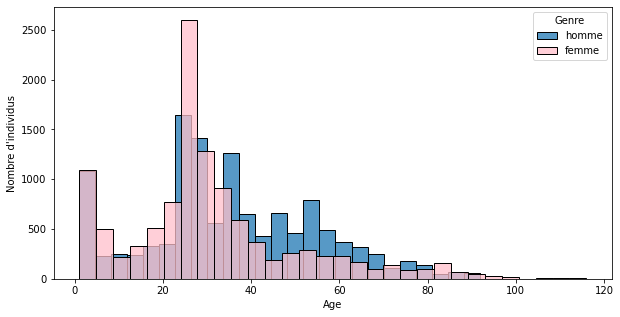

In [9]:
# Création d'un dataframe des ages pour les hommes et pour les femmes
df_hom = df[df["genre"] == "homme"]
df_fem = df[df["genre"] == "femme"]

# Distribution des ages pour les hommes et les femmes à base d'histogrammes
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df_hom, x="age", bins=30, color="tab:blue", ax=ax, label="homme")
sns.histplot(data=df_fem, x="age", bins=30, color="pink", ax=ax, label="femme")
ax.set_xlabel("Age")
ax.set_ylabel("Nombre d'individus")
ax.legend(title="Genre")
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/genre_age.png")
plt.show()

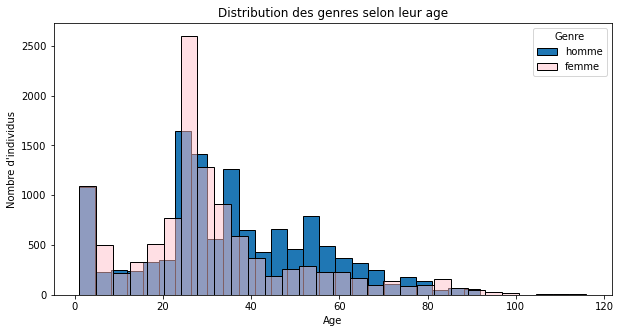

In [10]:
# Distribution des ages pour les hommes et les femmes à base d'histogrammes
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df_hom, x="age", bins=30, ax=ax, color="tab:blue", alpha=1, label="homme")
sns.histplot(data=df_fem, x="age", bins=30, ax=ax, color="pink", alpha=0.5, label="femme")
ax.set_title("Distribution des genres selon leur age")
ax.set_xlabel("Age")
ax.set_ylabel("Nombre d'individus")
ax.legend(title="Genre")
plt.show()

In [11]:
# Moyenne et écart type de l'age par homme et femme 
df_2 = df.groupby("genre").agg(mean=("age", "mean"), std=("age", "std"))

In [12]:
df_2

,mean,std
genre,,
femme,30.678186,19.752001
homme,35.695666,19.705223


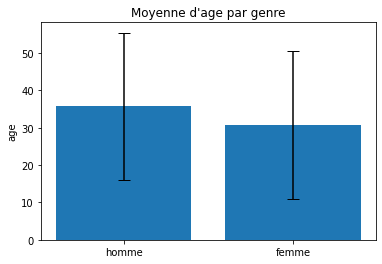

In [13]:
fig, ax = plt.subplots()
df_2 = df_2.loc[["homme", "femme"]]
ax.bar(df_2.index, df_2["mean"], yerr=df_2["std"], capsize=6)
ax.set_title("Moyenne d'age par genre")
ax.set_ylabel("age")
plt.show()

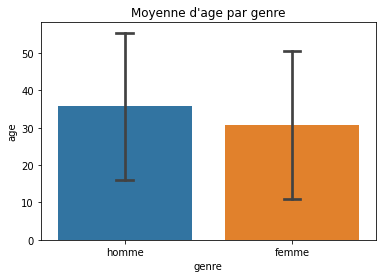

In [14]:
sns.barplot(data=df, x="genre", y="age", estimator="mean", errorbar="sd", capsize=0.1)
plt.title("Moyenne d'age par genre")
plt.show()